In [4]:
from os.path import exists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
if exists('housing.csv'):
    data = pd.read_csv('housing.csv')
else:
    raise FileNotFoundError('Filename not found')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split

x = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [9]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13774,-117.05,34.04,23.0,3967.0,766.0,1518.0,698.0,2.2900,INLAND,111800.0
1804,-122.33,37.93,34.0,2326.0,471.0,1356.0,441.0,2.3475,NEAR BAY,90300.0
5571,-118.29,33.87,32.0,1700.0,340.0,864.0,317.0,4.3810,<1H OCEAN,238700.0
12341,-116.55,33.84,28.0,2992.0,562.0,676.0,346.0,5.7613,INLAND,500001.0
12985,-121.30,38.66,32.0,2915.0,492.0,1292.0,454.0,3.3188,INLAND,117100.0
...,...,...,...,...,...,...,...,...,...,...
19290,-122.84,38.42,29.0,2756.0,551.0,1381.0,531.0,2.9625,<1H OCEAN,237300.0
18464,-121.74,37.19,11.0,1290.0,197.0,881.0,191.0,4.2039,<1H OCEAN,500001.0
16170,-122.47,37.81,45.0,6927.0,1258.0,4715.0,1165.0,3.4051,NEAR BAY,500001.0
16718,-120.66,35.49,17.0,4422.0,945.0,2307.0,885.0,2.8285,<1H OCEAN,171300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

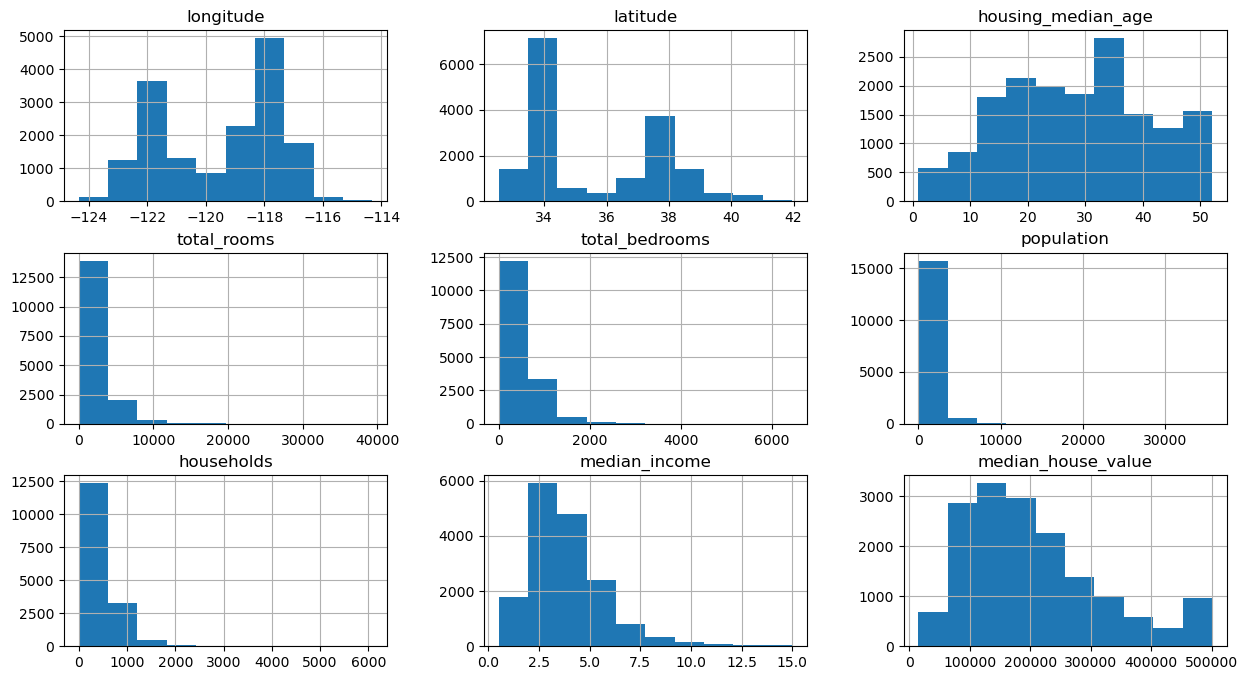

In [10]:
train_data.hist(figsize=(15,8))

/var/folders/p6/7rqrp6w17vl0ny3w4x6480br0000gn/T/ipykernel_1488/3679190433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap = ['yellow', 'green', 'blue'])


<Axes: >

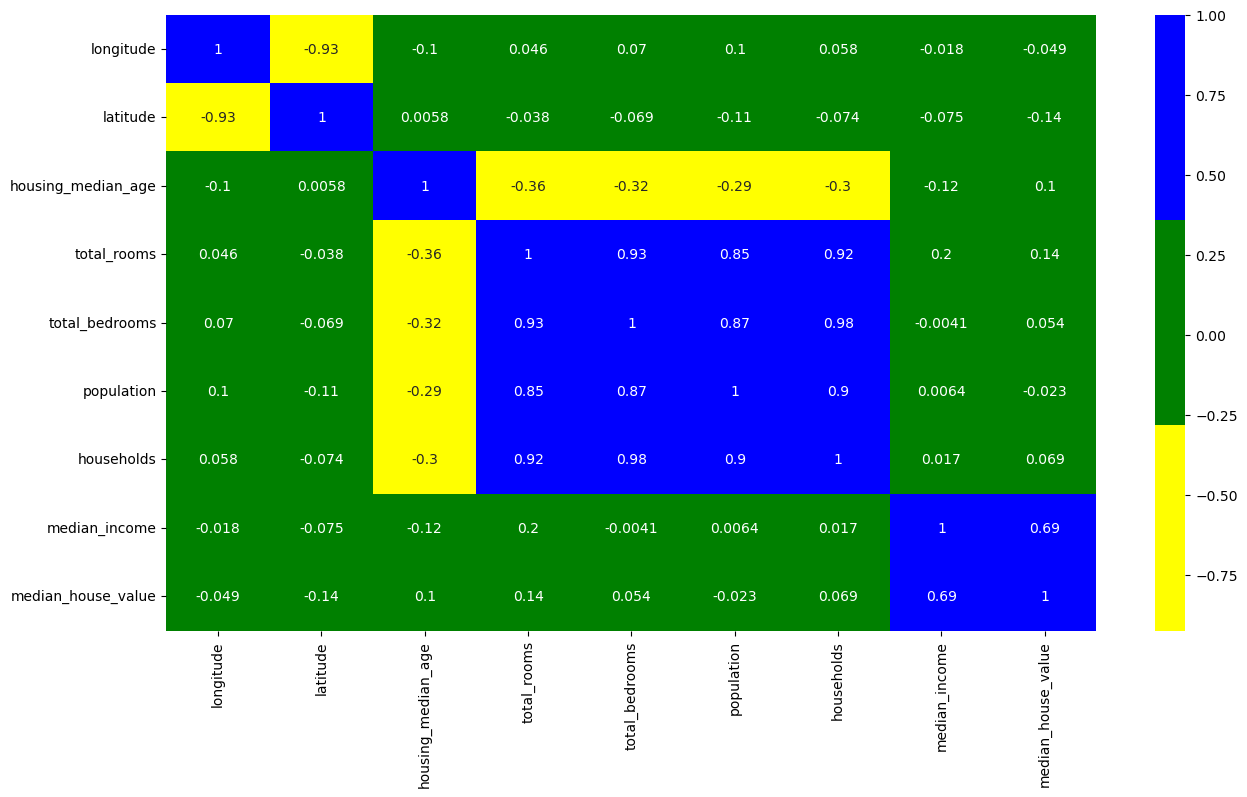

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = ['yellow', 'green', 'blue'])

In [12]:
train_data['population'] = np.log(train_data['population'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

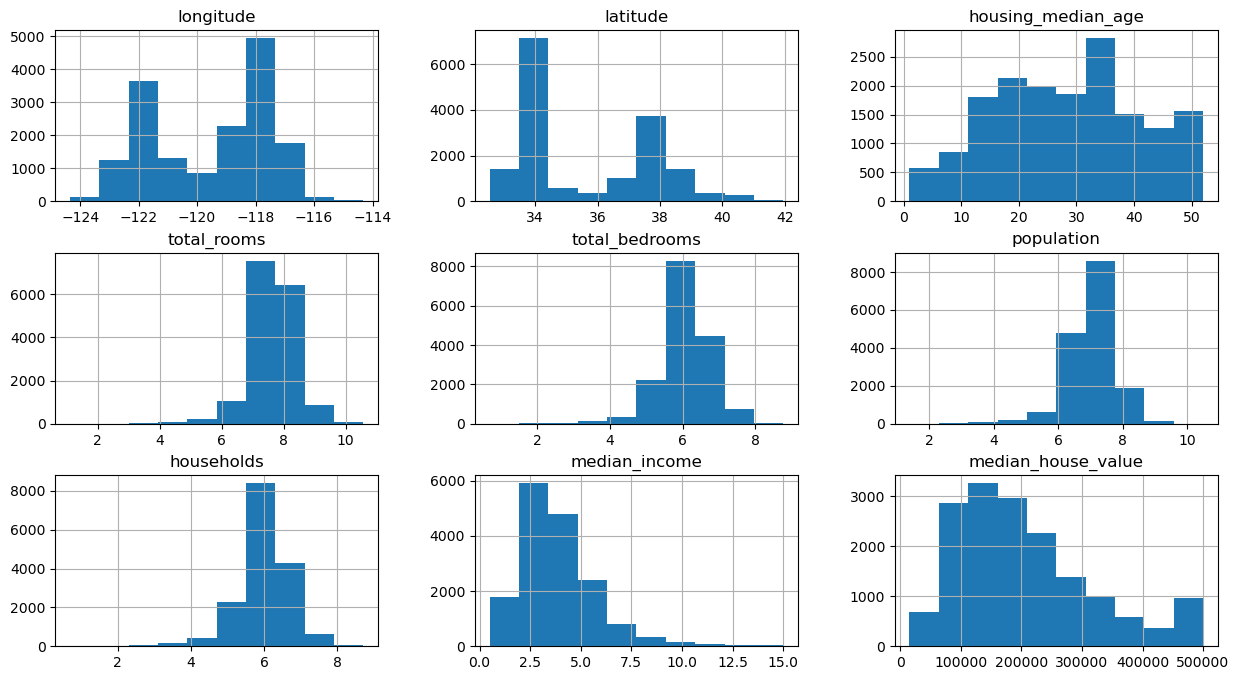

In [13]:
train_data.hist(figsize = (15,8))

In [14]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5172
NEAR OCEAN    2082
NEAR BAY      1812
ISLAND           3
Name: ocean_proximity, dtype: int64

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

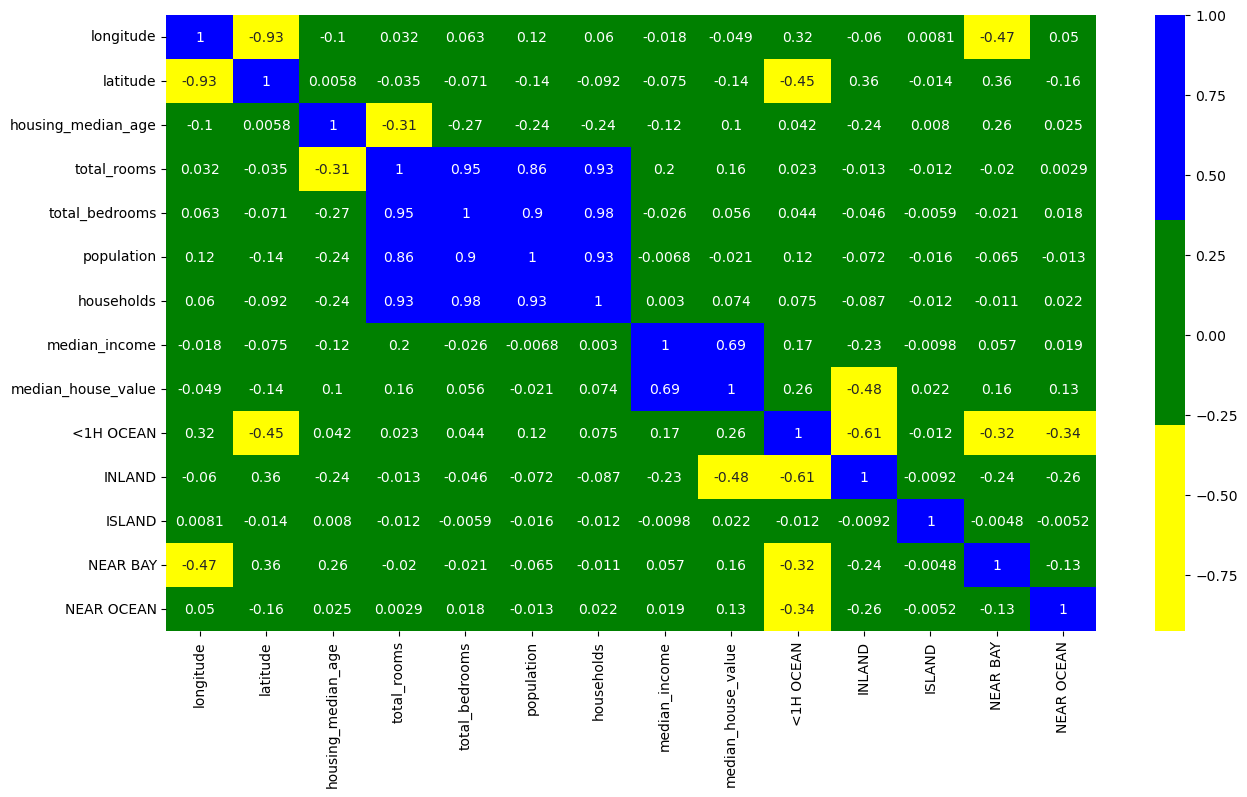

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = ['yellow', 'green', 'blue'])

In [17]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(('median_house_value'), axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s,y_train)

LinearRegression()

In [19]:
test_data = x_train.join(y_train)

test_data['population'] = np.log(test_data['population'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
13774,-117.05,34.04,23.0,2.228510,2.033723,2.119360,2.021501,2.2900,0,1,0,0,0,0.912593,1.102403,111800.0
1804,-122.33,37.93,34.0,2.169321,1.968088,2.105722,1.958870,2.3475,0,0,0,1,0,0.907237,1.107435,90300.0
5571,-118.29,33.87,32.0,2.132860,1.921600,2.049334,1.911326,4.3810,1,0,0,0,0,0.900950,1.115906,238700.0
12341,-116.55,33.84,28.0,2.197672,1.992423,2.017256,1.924150,5.7613,0,1,0,0,0,0.906606,1.142152,500001.0
12985,-121.30,38.66,32.0,2.194774,1.974152,2.099822,1.962949,3.3188,0,1,0,0,0,0.899479,1.118100,117100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19290,-122.84,38.42,29.0,2.188509,1.989729,2.107942,1.984670,2.9625,1,0,0,0,0,0.909171,1.102707,237300.0
18464,-121.74,37.19,11.0,2.099633,1.838686,2.051838,1.833780,4.2039,1,0,0,0,0,0.875718,1.144975,500001.0
16170,-122.47,37.81,45.0,2.286794,2.096553,2.246937,2.087079,3.4051,0,0,0,1,0,0.916809,1.095691,500001.0
16718,-120.66,35.49,17.0,2.240132,2.060799,2.168383,2.052419,2.8285,1,0,0,0,0,0.919945,1.091459,171300.0


In [20]:
x_test, y_test = train_data.drop(('median_house_value'), axis = 1), test_data['median_house_value']

In [21]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
13774,-117.05,34.04,23.0,8.286017,6.642487,7.325808,6.549651,2.2900,0,1,0,0,0,0.801650,1.265108
1804,-122.33,37.93,34.0,7.752335,6.156979,7.213032,6.091310,2.3475,0,0,0,1,0,0.794210,1.272688
5571,-118.29,33.87,32.0,7.438972,5.831882,6.762730,5.762051,4.3810,1,0,0,0,0,0.783964,1.291028
12341,-116.55,33.84,28.0,8.004032,6.333280,6.517671,5.849325,5.7613,0,1,0,0,0,0.791261,1.368368
12985,-121.30,38.66,32.0,7.977968,6.200509,7.164720,6.120297,3.3188,0,1,0,0,0,0.777204,1.303526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19290,-122.84,38.42,29.0,7.921898,6.313548,7.231287,6.276643,2.9625,1,0,0,0,0,0.796974,1.262123
18464,-121.74,37.19,11.0,7.163172,5.288267,6.782192,5.257495,4.2039,1,0,0,0,0,0.738258,1.362469
16170,-122.47,37.81,45.0,8.843326,7.138073,8.458716,7.061334,3.4051,0,0,0,1,0,0.807171,1.252359
16718,-120.66,35.49,17.0,8.394573,6.852243,7.744137,6.786717,2.8285,1,0,0,0,0,0.816270,1.236912


In [22]:
x_test_s = scaler.transform(x_test)

In [23]:
reg.score(x_test_s,y_test)

0.6668326626370623

In [96]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
forest.score(x_test,y_test)

0.973995536991117